In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#зчитування з файлу
df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [2]:
def write_to_file(data):
    with open(os.path.join(os.getcwd(), 'answers.txt'), 'a') as f:
        f.write(str(data + '\n'))


In [3]:
# Подсчет пропусков в каждом столбце
num_missing = df.isna().sum()

# Вывод количества пропусков в каждом столбце
print(num_missing)

# Запись ответа на вопрос в файл
if num_missing.sum() > 0:
    write_to_file('Чи є в якихось змінних пропуски? Відповідь: так')
else:
    write_to_file('Чи є в якихось змінних пропуски? Відповідь: ні')

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [4]:
# Які є унікальні жанри?

unique_genres = df['genre'].unique()
print(unique_genres)

write_to_file('Які є унікальні жанри? Відповідь: ' + ', '.join(unique_genres))

['Non Fiction' 'Fiction']


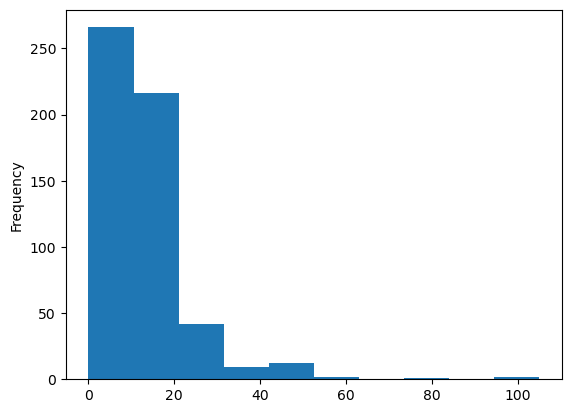

In [5]:
# діаграмa розподілy цін 

df['price'].plot(kind='hist')
plt.show()

In [6]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(f"Яка ціна у нас максимальна? Відповідь: {max_price}")
print(f"Яка ціна у нас мінімальна? Відповідь: {min_price}")
print(f"Яка ціна у нас середня? Відповідь: {mean_price}")
print(f"Яка у нас медіанна цін? Відповідь: {median_price}")

write_to_file(f"Яка ціна у нас максимальна? Відповідь: {max_price}")
write_to_file(f"Яка ціна у нас мінімальна? Відповідь: {min_price}")
write_to_file(f"Яка ціна у нас середня? Відповідь: {mean_price}")
write_to_file(f"Яка у нас медіанна цін? Відповідь: {median_price}")

Яка ціна у нас максимальна? Відповідь: 105
Яка ціна у нас мінімальна? Відповідь: 0
Яка ціна у нас середня? Відповідь: 13.1
Яка у нас медіанна цін? Відповідь: 11.0


In [7]:
# найвищий рейтинг у датасеті

max_rating = df['user_rating'].max()

print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_price}")
write_to_file(f"Який рейтинг у датасеті найвищий? Відповідь: {max_price}")


Який рейтинг у датасеті найвищий? Відповідь: 105


In [8]:
# Скільки книг мають такий рейтинг?

num_books = df[df['user_rating'] == max_rating]['user_rating'].value_counts().iloc[0]

print(f"Скільки книг мають такий рейтинг? Відповідь: {num_books}")
write_to_file(f"Скільки книг мають такий рейтинг? Відповідь: {num_books}")


Скільки книг мають такий рейтинг? Відповідь: 52


In [9]:
# Яка книга має найбільше відгуків?

df['reviews'] = df['reviews'].astype(str)
max_reviews = df.loc[df['reviews'].astype(int).idxmax(), 'name']

print(f"Яка книга має найбільше відгуків? Відповідь: {max_reviews}")
write_to_file(f"Яка книга має найбільше відгуків? Відповідь: {max_reviews}")

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [10]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

# Вибірка книг з Топ-50 2015 року
top_books_2015 = df.loc[(df['year'] == 2015) & (df['user_rating'] >= 4.5)]

# Сортування за зростанням ціни та вибір найдорожчої книги
expensive_book = top_books_2015.sort_values('price', ascending=False).iloc[0]

print(f"Яка найдорожча книга 2015 року з топ 50? Відповідь: {expensive_book['name']}")
write_to_file(f"Яка найдорожча книга 2015 року з топ 50? Відповідь: {expensive_book['name']}")

Яка найдорожча книга 2015 року з топ 50? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [11]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?

fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
num_fiction_2010 = fiction_2010.shape[0]

print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {num_fiction_2010}")
write_to_file(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {num_fiction_2010}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20


In [12]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

# Вибираємо книги з рейтингом 4.9
df_49 = df[df['user_rating'] == 4.9]

# Вибираємо книги, які потрапили до рейтингу у 2010 та 2011 роках
df_1011 = df[df['year'].isin([2010, 2011])]

# Об'єднуємо датафрейми за допомогою оператора "або"
df_49_1011 = df_49[(df_49['year'] == 2010) | (df_49['year'] == 2011)]

# Знаходимо кількість книг у датафреймі df_49_1011
count_49_1011 = len(df_49_1011)

print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {count_49_1011}")
write_to_file(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {count_49_1011}")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1


In [13]:
# Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів

# відфільтруємо дані
filtered_books = df[(df['year'] == 2015) & (df['price'] < 8)]

# відсортуємо результат
sorted_books = filtered_books.sort_values('price')

# знайдемо останню книгу у списку
last_book = sorted_books.iloc[-1]['name']

# відповідь запишемо в файл
print(f"Яка книга остання у відсортованому списку? Відповідь: {last_book}")
write_to_file(f"Яка книга остання у відсортованому списку? Відповідь: {last_book}")

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


In [14]:
# подивимося на максимальну та мінімальну ціни для кожного з жанрів



# групуємо за жанрами та знаходимо мінімальну та максимальну ціни
price_stats = df.groupby('genre')['price'].agg(['max', 'min'])

print(f"Максимальна ціна для жанру Fiction? Відповідь: {price_stats.loc['Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Fiction? Відповідь: {price_stats.loc['Fiction', 'min']}")
print(f"Максимальна ціна для жанру Non Fiction? Відповідь: {price_stats.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Non Fiction? Відповідь: {price_stats.loc['Non Fiction', 'min']}")

# записуємо результат в файл

write_to_file(f"Максимальна ціна для жанру Fiction? Відповідь: {price_stats.loc['Fiction', 'max']}")
write_to_file(f"Мінімальна ціна для жанру Fiction? Відповідь: {price_stats.loc['Fiction', 'min']}")
write_to_file(f"Максимальна ціна для жанру Non Fiction? Відповідь: {price_stats.loc['Non Fiction', 'max']}")
write_to_file(f"Мінімальна ціна для жанру Non Fiction? Відповідь: {price_stats.loc['Non Fiction', 'min']}")



Максимальна ціна для жанру Fiction? Відповідь: 82
Мінімальна ціна для жанру Fiction? Відповідь: 0
Максимальна ціна для жанру Non Fiction? Відповідь: 105
Мінімальна ціна для жанру Non Fiction? Відповідь: 0


In [15]:
# новий датафрейм, який вміщатиме кількість книг для кожного з авторів

book_count = df.groupby('author').agg({'name': 'count'})

# Розмірність таблиці

print(f"Якої розмірності вийшла таблиця? Відповідь: {book_count.shape}")


# Автор з найбільшою кількістю книг
max_author = book_count['name'].idxmax()
print(f"Який автор має найбільше книг? Відповідь: {max_author}")


# Кількість книг цього автора

max_books = book_count.loc[max_author, 'name']

print(f"Скільки книг цього автора? Відповідь: {max_books}")

write_to_file(f"Якої розмірності вийшла таблиця? Відповідь: {book_count.shape}")
write_to_file(f"Який автор має найбільше книг? Відповідь: {max_author}")
write_to_file(f"Скільки книг цього автора? Відповідь: {max_books}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [16]:
# другий датафрейм

df_author = df.groupby('author')['user_rating'].mean().reset_index()
df_author.columns = ['author', 'avg_rating']

# Для знаходження автора з найменшим середнім рейтингом, ми можемо відсортувати другий датафрейм за зростанням середнього рейтингу та взяти перший рядок

min_avg_rating_author = df_author.sort_values('avg_rating').iloc[0]['author']

# Тепер, щоб отримати середній рейтинг для цього автора, ми можемо використати метод loc

min_avg_rating = df_author.loc[df_author['author'] == min_avg_rating_author]['avg_rating'].values[0]

print(f"У якого автора середній рейтинг мінімальний? Відповідь: {min_avg_rating_author}")
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {min_avg_rating}")

write_to_file(f"У якого автора середній рейтинг мінімальний? Відповідь: {min_avg_rating_author}")
write_to_file(f"Який у цього автора середній рейтинг? Відповідь: {min_avg_rating}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
У якого автора середній рейтинг мінімальний? Відповідь: 3.9


In [17]:
# з'єднання двох датафреймів
result_df = pd.concat([book_count, df_author['avg_rating']], axis=1)
result_df.columns = ['book_count', 'avg_rating']
print(result_df)
print(result_df.columns)

                            book_count  avg_rating
Abraham Verghese                   2.0         NaN
Adam Gasiewski                     1.0         NaN
Adam Mansbach                      1.0         NaN
Adir Levy                          1.0         NaN
Admiral William H. McRaven         1.0         NaN
...                                ...         ...
243                                NaN    4.566667
244                                NaN    4.400000
245                                NaN    4.600000
246                                NaN    4.800000
247                                NaN    4.600000

[496 rows x 2 columns]
Index(['book_count', 'avg_rating'], dtype='object')


In [18]:
# сортування датафрейму за зростаючою кількістю книг та зростаючим рейтингом
result_df_sorted = result_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])

# виведення першого автора зі списку
first_author = result_df_sorted.index[0]

print(f"Перший автор у списку? Відповідь: {first_author}")

write_to_file(f"Який автор перший у списку? Відповідь: {first_author}")

Перший автор у списку? Відповідь: Adam Gasiewski


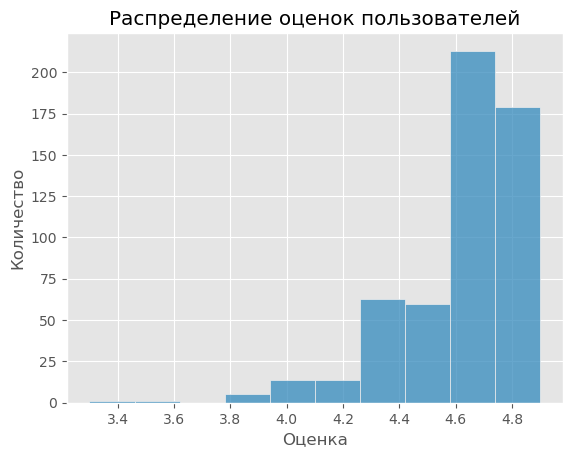

In [2]:
# Загрузка стиля
plt.style.use('ggplot')

# Создание гистограммы
sns.histplot(df['user_rating'], kde=False, bins=10)

# Добавление заголовка и меток осей
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')

# Отображение графика
plt.show()

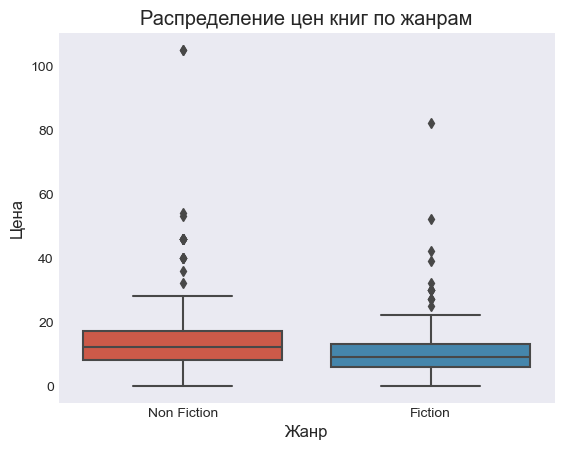

In [3]:
# Загрузка стиля
plt.style.use('seaborn-dark')

# Создание ящика с усами
sns.boxplot(x='genre', y='price', data=df)

# Добавление заголовка и меток осей
plt.title('Распределение цен книг по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Цена')

# Отображение графика
plt.show()


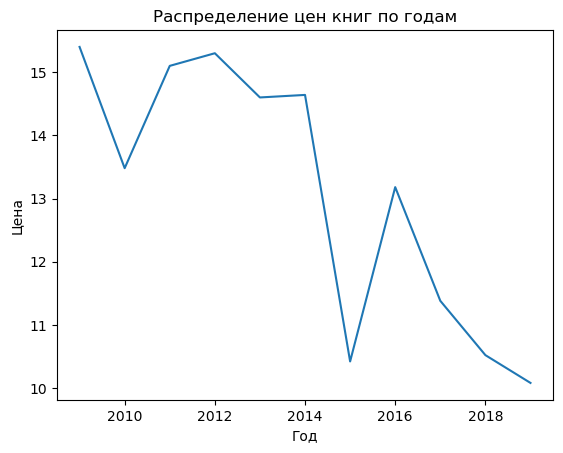

In [4]:
# Загрузка стиля
plt.style.use('default')

# Создание графика распределения цен по годам
sns.lineplot(x='year', y='price', data=df, ci=None)

# Добавление заголовка и меток осей
plt.title('Распределение цен книг по годам')
plt.xlabel('Год')
plt.ylabel('Цена')

# Отображение графика
plt.show()
